🏠 House Price Prediction - Exploratory Data Analysis (EDA)

In [133]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 

In [134]:
# We load the dataset from the provided CSV file into a pandas DataFrame 

df=pd.read_csv('../data/housing.csv')

In [135]:
# We display the first few rows -> 5 of the DataFrame to understand its structure using the head() method
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [136]:
# Lets see the details information about the DataFrame using the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [137]:
# Lets check is there any missing values in the DataFrame using the isnull() method along with sum() to get the count of missing values in each column
print("Missing values in each column:")
df.isna().sum()

Missing values in each column:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [138]:
# Lets check the duplicate rows in the DataFrame using the duplicated() method along with sum() to get the count of duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


#### Key Insights from the Dataset

- **Shape:** 545 rows × 13 columns  
- **Numerical Columns:** price, area, bedrooms, bathrooms, stories, parking  
- **Categorical Columns:** mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus  
- **Missing Values:** None  
- **Duplicates:** None  


##### Lets See Some Statistics of the Dataset

In [139]:
# Lets see the statistical summary of the DataFrame using the describe() method
print("Statistical summary of the DataFrame:")
df.describe()

Statistical summary of the DataFrame:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Numerical columns in the DataFrame: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


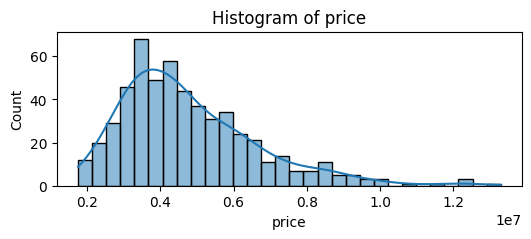

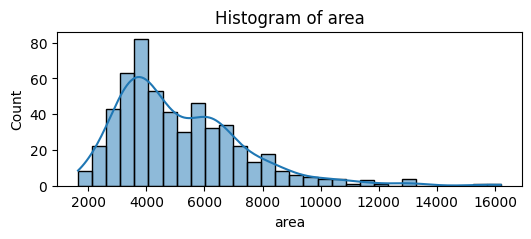

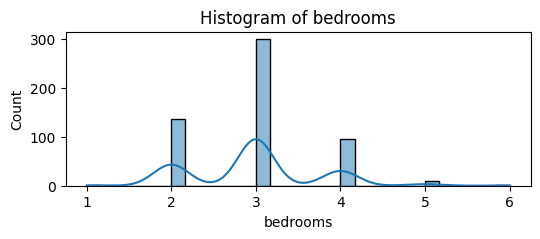

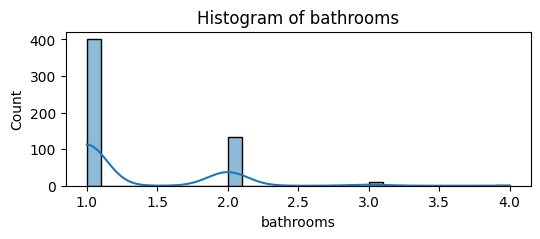

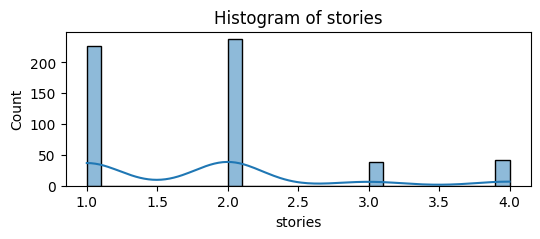

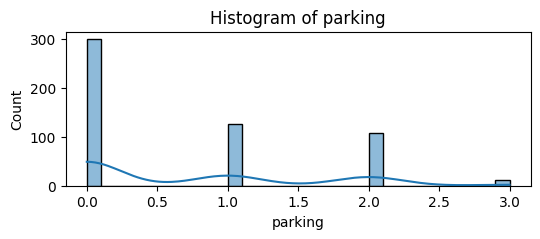

In [140]:

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns in the DataFrame:", numerical_columns)
# Plotting histograms for numerical columns to visualize their distributions
for column in numerical_columns:
    plt.figure(figsize=(6, 2))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.show()


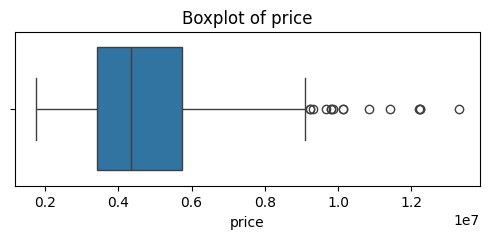

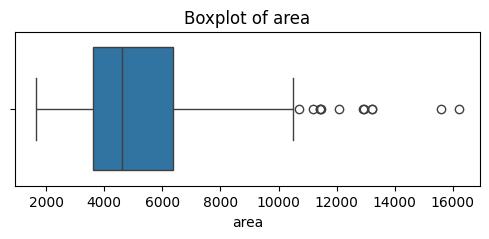

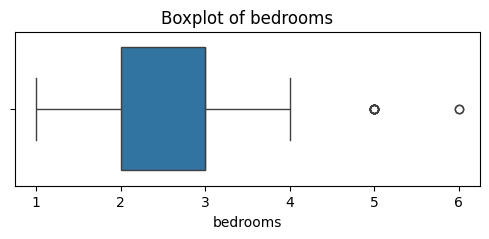

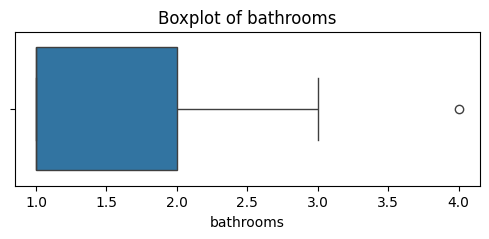

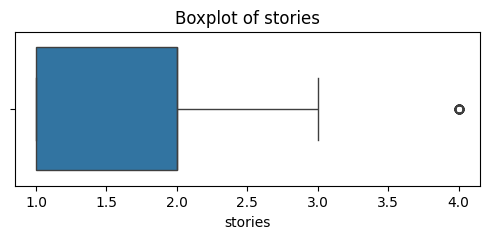

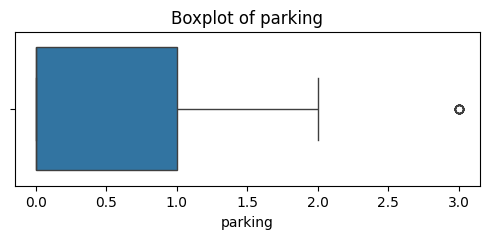

In [141]:
# Lets visualize the outlires in the numerical columns using boxplots
for column in numerical_columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    

In [142]:
# I see that there are some outliers in the dataset, so I will check using Interquartile Range (IQR) method for each numerical column

number_columns = df.select_dtypes(include=[np.number]).columns
for column in number_columns:
    '''Calculating the Interquartile Range (IQR) for each numerical column to identify outliers.
    The IQR is the range between the first quartile (Q1) and the third quartile (Q3).
    Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    The code iterates through each numerical column, calculates Q1, Q3, and IQR, and then identifies outliers based on these values.
    Finally, it prints the number of outliers found in each column.'''
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}, Number of outliers: {len(outliers)}")
    


Column: price, Number of outliers: 15
Column: area, Number of outliers: 12
Column: bedrooms, Number of outliers: 12
Column: bathrooms, Number of outliers: 1
Column: stories, Number of outliers: 41
Column: parking, Number of outliers: 12


#### Outlier Treatment Approach

1. **Price:** Log transform to reduce skewness.
2. **Area:** Cap extreme values at upper/lower bounds.
3. **Bedrooms:** Cap at realistic maximum (e.g., 5).
4. **Bathrooms:** Cap at realistic maximum (e.g., 4).
5. **Stories:** Cap at realistic maximum (e.g., 3).
6. **Parking:** Cap at realistic maximum (e.g., 3).


In [143]:
# Log-transforming the price column to reduce skewness and improve normality
df['price']= np.log1p(df['price']) 



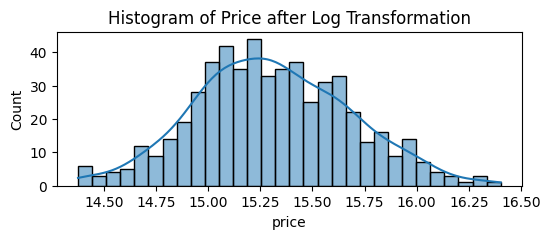

In [144]:
# Re-plotting the histogram of the 'price' column after log transformation
plt.figure(figsize=(6, 2))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Histogram of Price after Log Transformation')
plt.show()

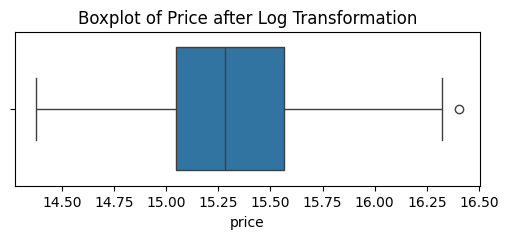

In [145]:
# Lets check the outliers in the 'price' column using boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price after Log Transformation')
plt.show()


In [146]:
# I will handel the outlier in the area column using capping method
# Capping is a method where we set a threshold for the maximum value of a variable.

q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Capping the outliers
df['area'] = np.where(df['area']> upper_bound, upper_bound,np.where(df['area'] < lower_bound, lower_bound, df['area']))


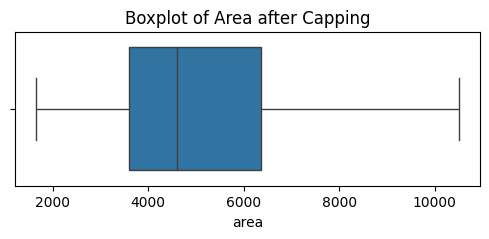

In [147]:
# Re-plotting the boxplot of the 'area' column after capping
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['area'])
plt.title('Boxplot of Area after Capping')
plt.show()

In [148]:
# Now lets handel the outlier in the 'bedrooms' column using capping method
# Capping the outliers in the 'bedrooms' column
# As we  can see that the 'bedrooms' column has some outliers, we can cap them using the same method as above
q1_bedrooms = df['bedrooms'].quantile(0.25)
q3_bedrooms = df['bedrooms'].quantile(0.75)
iqr_bedrooms = q3_bedrooms - q1_bedrooms
lower_bound_bedrooms = q1_bedrooms - 1.5 * iqr_bedrooms
upper_bound_bedrooms = q3_bedrooms + 1.5 * iqr_bedrooms
# Capping the outliers
df['bedrooms'] = np.where(df['bedrooms'] > upper_bound_bedrooms, upper_bound_bedrooms,
                            np.where(df['bedrooms'] < lower_bound_bedrooms, lower_bound_bedrooms, df['bedrooms']))



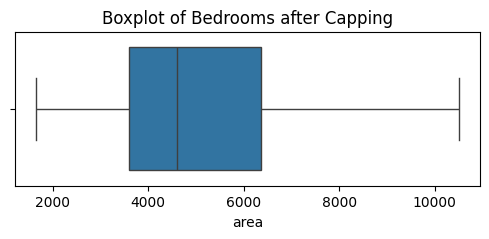

In [149]:

# Re-plotting the boxplot of the 'area' column after capping
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['area'])
plt.title('Boxplot of Bedrooms after Capping')  
plt.show()



In [150]:
# lets see the outliers in the 'bathrooms' column using interquartile range (IQR) method

q1_bathrooms = df['bathrooms'].quantile(0.25)
q3_bathrooms = df['bathrooms'].quantile(0.75)
iqr_bathrooms = q3_bathrooms - q1_bathrooms
lower_bound_bathrooms = q1_bathrooms - 1.5 * iqr_bathrooms
upper_bound_bathrooms = q3_bathrooms + 1.5 * iqr_bathrooms
# Capping the outliers in the 'bathrooms' column
outliers= df[(df['bathrooms'] < lower_bound_bathrooms) | (df['bathrooms'] > upper_bound_bathrooms)]
print(f"Number of outliers in 'bathrooms' column: {len(outliers)}: {outliers['bathrooms'].values}")


Number of outliers in 'bathrooms' column: 1: [4]


In [151]:
# lets hadel the outlier in the 'bathrooms' column using capping method
df['bathrooms'] = np.where(df['bathrooms'] > upper_bound_bathrooms, upper_bound_bathrooms,
                            np.where(df['bathrooms'] < lower_bound_bathrooms, lower_bound_bathrooms, df['bathrooms']))



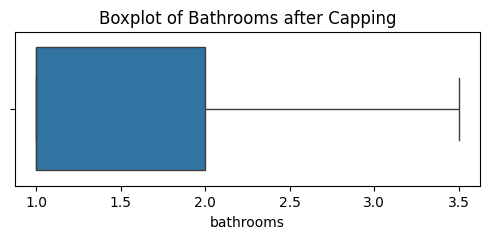

In [152]:
# lets visualize the 'bathrooms' column after capping using boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of Bathrooms after Capping')
plt.show()


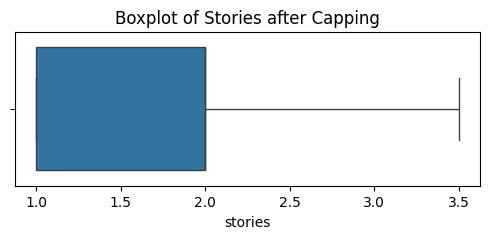

In [153]:
# Same like that lets handel the outlier of  stories and paarking columns using capping method
# Capping the outliers in the 'stories' column
q1_stories = df['stories'].quantile(0.25)
q3_stories = df['stories'].quantile(0.75)
iqr_stories = q3_stories - q1_stories
lower_bound_stories = q1_stories - 1.5 * iqr_stories
upper_bound_stories = q3_stories + 1.5 * iqr_stories
# Capping the outliers
df['stories'] = np.where(df['stories'] > upper_bound_stories, upper_bound_stories,
                            np.where(df['stories'] < lower_bound_stories, lower_bound_stories, df['stories']))
# lets visualize the 'stories' column after capping using boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['stories'])
plt.title('Boxplot of Stories after Capping')
plt.show()


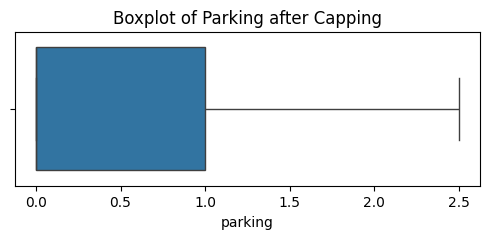

In [154]:
# Now lets handel the outlier of parking column using capping method
# Capping the outliers in the 'parking' column
q1_parking = df['parking'].quantile(0.25)
q3_parking = df['parking'].quantile(0.75)
iqr_parking = q3_parking - q1_parking
lower_bound_parking = q1_parking - 1.5 * iqr_parking
upper_bound_parking = q3_parking + 1.5 * iqr_parking
# Capping the outliers
df['parking'] = np.where(df['parking'] > upper_bound_parking, upper_bound_parking,
                            np.where(df['parking'] < lower_bound_parking, lower_bound_parking, df['parking']))

# lets visualize the 'parking' column after capping using boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['parking'])
plt.title('Boxplot of Parking after Capping')
plt.show()


In [155]:
# Now lets see wheather there is an outlier or not:

number_columns = df.select_dtypes(include=[np.number]).columns
for column in number_columns:
    '''Calculating the Interquartile Range (IQR) for each numerical column to identify outliers.
    The IQR is the range between the first quartile (Q1) and the third quartile (Q3).
    Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    The code iterates through each numerical column, calculates Q1, Q3, and IQR, and then identifies outliers based on these values.
    Finally, it prints the number of outliers found in each column.'''
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}, Number of outliers: {len(outliers)}")

Column: price, Number of outliers: 1
Column: area, Number of outliers: 0
Column: bedrooms, Number of outliers: 0
Column: bathrooms, Number of outliers: 0
Column: stories, Number of outliers: 0
Column: parking, Number of outliers: 0


In [156]:
# Let see the  data again after handling the outliers
print("Data after handling outliers:")
print(df.describe())

Data after handling outliers:
            price          area    bedrooms   bathrooms     stories  \
count  545.000000    545.000000  545.000000  545.000000  545.000000   
mean    15.306987   5102.249541    2.950459    1.285321    1.767890   
std      0.372165   2005.804353    0.697504    0.497942    0.777543   
min     14.375127   1650.000000    1.000000    1.000000    1.000000   
25%     15.048071   3600.000000    2.000000    1.000000    1.000000   
50%     15.283385   4600.000000    3.000000    1.000000    2.000000   
75%     15.562970   6360.000000    3.000000    2.000000    2.000000   
max     16.403275  10500.000000    4.500000    3.500000    3.500000   

          parking  
count  545.000000  
mean     0.682569  
std      0.834773  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      2.500000  


In [157]:
print(df.head(10))
# Remember that the price column has been log transformed, so the values are not in the original scale as we applied log transformation to reduce skewness.if you want to see the original scale, you can apply np.expm1 to the price column to get the original values.
# df['price'] = np.expm1(df['price'])
# df['price']

       price     area  bedrooms  bathrooms  stories mainroad guestroom  \
0  16.403275   7420.0       4.0        2.0      3.0      yes        no   
1  16.321037   8960.0       4.0        3.5      3.5      yes        no   
2  16.321037   9960.0       3.0        2.0      2.0      yes        no   
3  16.318175   7500.0       4.0        2.0      2.0      yes        no   
4  16.250001   7420.0       4.0        1.0      2.0      yes       yes   
5  16.199676   7500.0       3.0        3.0      1.0      yes        no   
6  16.132984   8580.0       4.0        3.0      3.5      yes        no   
7  16.132984  10500.0       4.5        3.0      2.0      yes        no   
8  16.105011   8100.0       4.0        1.0      2.0      yes       yes   
9  16.097893   5750.0       3.0        2.0      3.5      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes      2.0      yes        furnished  
1       no              n

#### 4. Exploratory Data Analysis (EDA)
We’ll explore relationships between variables and visualize patterns.

In [158]:
# as the data type of price, area are float64 no need to change them, but since the data type of
# bedrooms, bathrooms, stories, and parking are float64, we can convert them to int64 for better memory usage and performance.

df['bedrooms'] = df['bedrooms'].astype(np.int64)
df['bathrooms'] = df['bathrooms'].astype(np.int64)
df['stories'] = df['stories'].astype(np.int64)
df['parking'] = df['parking'].astype(np.int64)


In [159]:
# Now Lets do encoding the categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns in the DataFrame:", categorical_columns)



Categorical columns in the DataFrame: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [160]:
# Display unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'mainroad': ['yes' 'no']
Unique values in 'guestroom': ['no' 'yes']
Unique values in 'basement': ['no' 'yes']
Unique values in 'hotwaterheating': ['no' 'yes']
Unique values in 'airconditioning': ['yes' 'no']
Unique values in 'prefarea': ['yes' 'no']
Unique values in 'furnishingstatus': ['furnished' 'semi-furnished' 'unfurnished']


In [161]:
## As we can see the columns 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea' are categorical columns with binary values (Yes/No).

# So i prefer to use map() method to convert the binary categorical columns to numerical values (0 and 1).
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = df[col].map({'yes': 1, 'no': 0})




In [162]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420.0,4,2,3,1,0,0,0,1,2,1,furnished
1,16.321037,8960.0,4,3,3,1,0,0,0,1,2,0,furnished
2,16.321037,9960.0,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,16.318175,7500.0,4,2,2,1,0,1,0,1,2,1,furnished
4,16.250001,7420.0,4,1,2,1,1,1,0,1,2,0,furnished


In [163]:
# As we can see that the 'furnishingstatus' column has multiple categories but in the order as follows:
# 'furnished', 'semi-furnished', 'unfurnished'. So we can use ordinal encoding to convert this column to numerical values.

from sklearn.preprocessing import OrdinalEncoder
# Create an OrdinalEncoder instance with the specified categories
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])

# Fit and transform the 'furnishingstatus' column
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])

# as the furnitute column has been encoded to numerical values, we can convert it to int64 for better memory usage and performance.
df['furnishingstatus'] = df['furnishingstatus'].astype(np.int64)


In [164]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420.0,4,2,3,1,0,0,0,1,2,1,2
1,16.321037,8960.0,4,3,3,1,0,0,0,1,2,0,2
2,16.321037,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,16.318175,7500.0,4,2,2,1,0,1,0,1,2,1,2
4,16.250001,7420.0,4,1,2,1,1,1,0,1,2,0,2


In [165]:
df.dtypes

price               float64
area                float64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus      int64
dtype: object

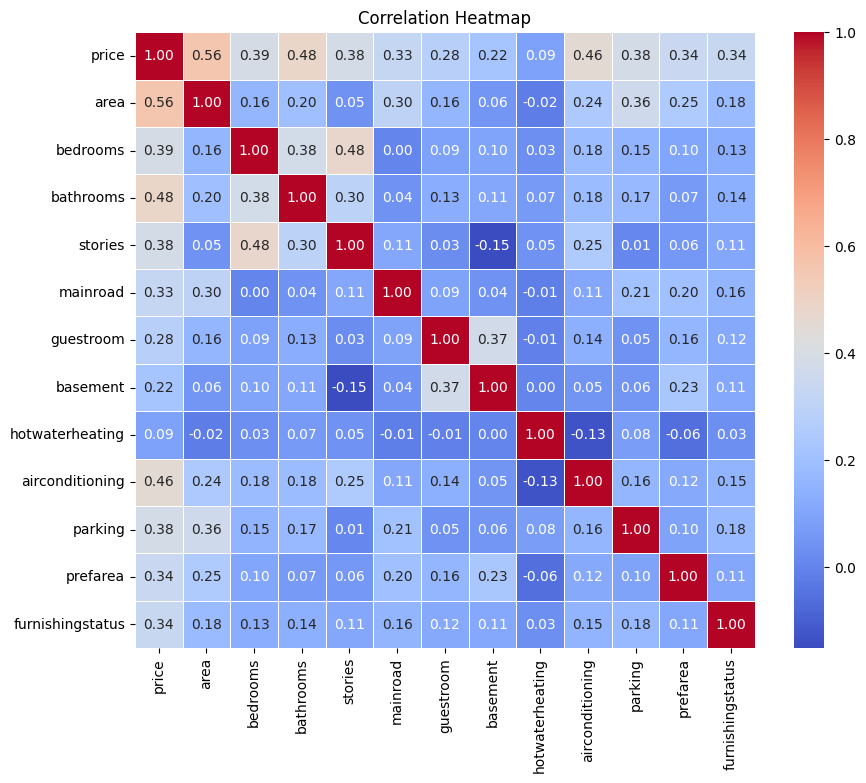

In [166]:
# Lets Visualize the correlation between the numerical columns using a heatmap

correlation_values = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


🔍 Features to Remove:

basement
➤ Perfectly correlated with hotwaterheating (correlation = 1.0), making it redundant.

hotwaterheating
➤ Perfectly correlated with basement, adds no additional predictive value.


In [167]:
# lets remove the unwanted columns from the DataFrame
unwanted_features = ['hotwaterheating', 'basement','guestroom']

# Drop the unwanted features from the DataFrame
df.drop(columns=unwanted_features, inplace=True)

# Display the DataFrame after removing unwanted features
print("DataFrame after removing unwanted features:")
print(df.head())


DataFrame after removing unwanted features:
       price    area  bedrooms  bathrooms  stories  mainroad  airconditioning  \
0  16.403275  7420.0         4          2        3         1                1   
1  16.321037  8960.0         4          3        3         1                1   
2  16.321037  9960.0         3          2        2         1                0   
3  16.318175  7500.0         4          2        2         1                1   
4  16.250001  7420.0         4          1        2         1                1   

   parking  prefarea  furnishingstatus  
0        2         1                 2  
1        2         0                 2  
2        2         1                 1  
3        2         1                 2  
4        2         0                 2  


#####  Data Visualization

### 1. Target Variable Distribution – price

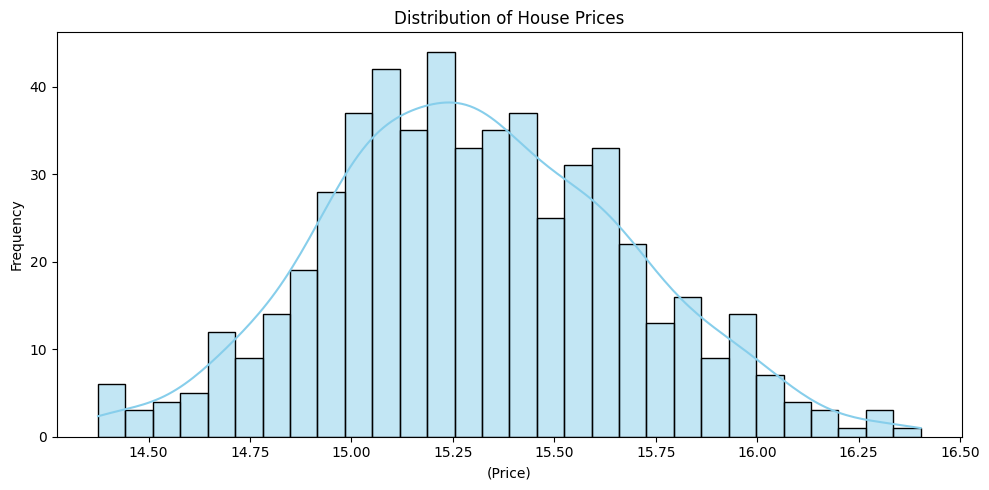

In [168]:
# --------------------------------------
# 1. Price Distribution
# --------------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

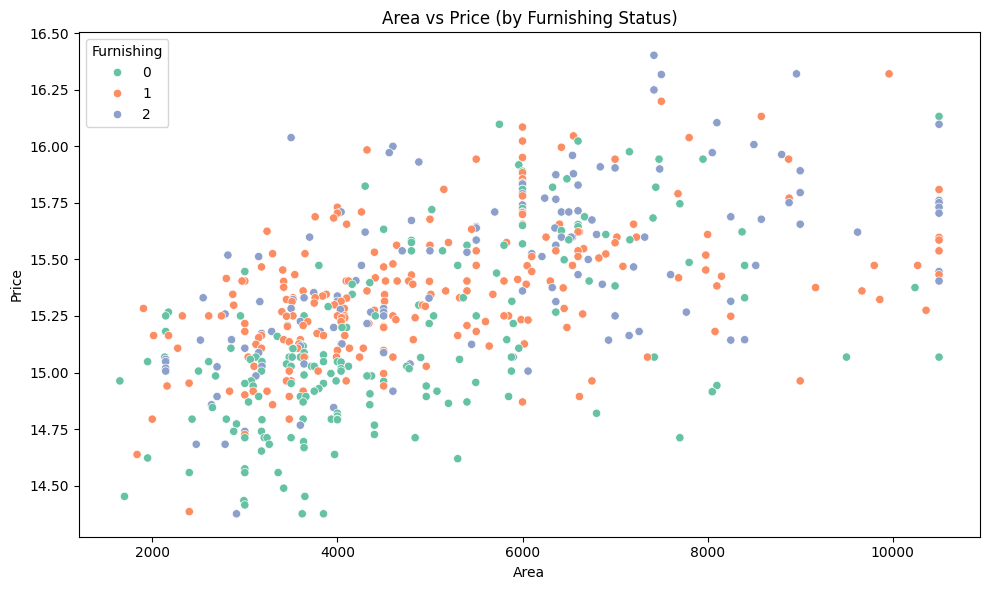

In [169]:
# --------------------------------------
# 2. Area vs Price (Scatter Plot)
# --------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='furnishingstatus', data=df, palette='Set2')
plt.title('Area vs Price (by Furnishing Status)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Furnishing')
plt.tight_layout()
plt.show()

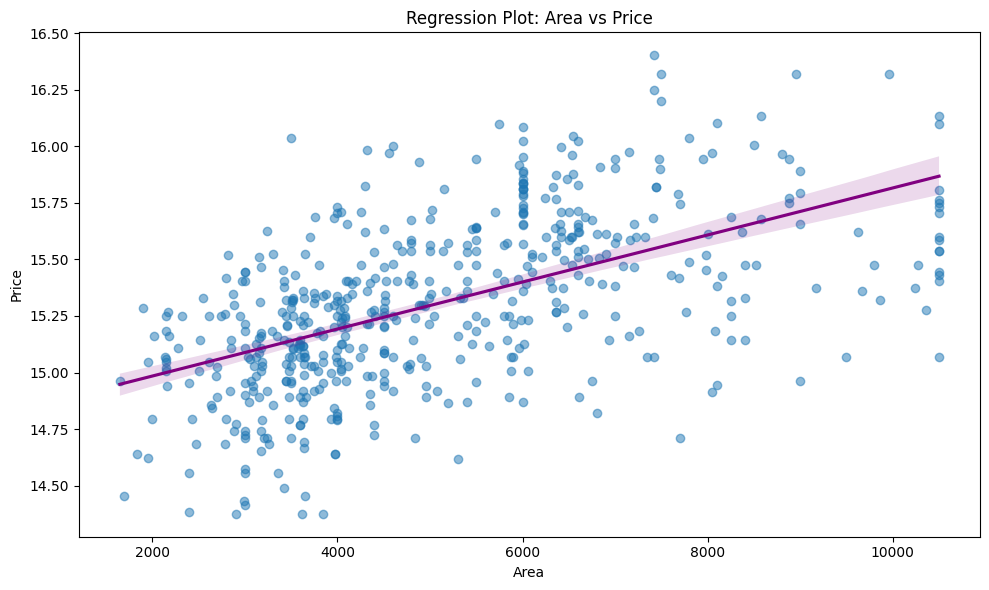

In [170]:
# lets do regresssion plot to see the relationship between area and price
plt.figure(figsize=(10, 6))
sns.regplot(x='area', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'purple'})
plt.title('Regression Plot: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.tight_layout()  
plt.show()


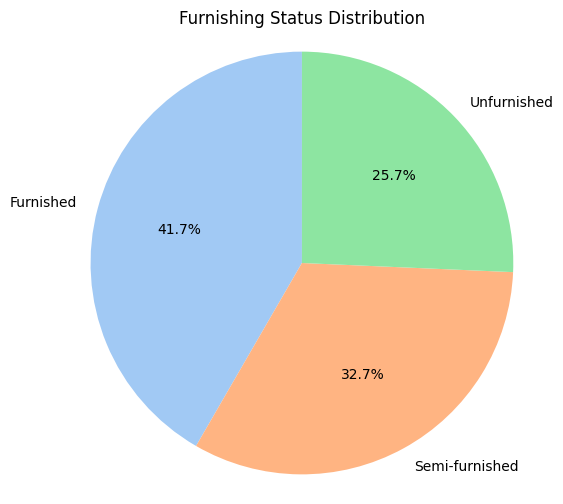

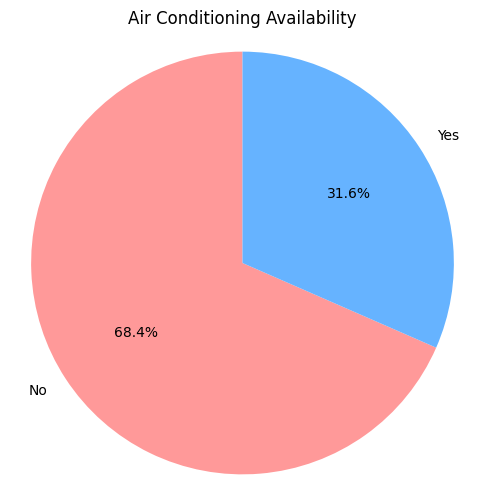

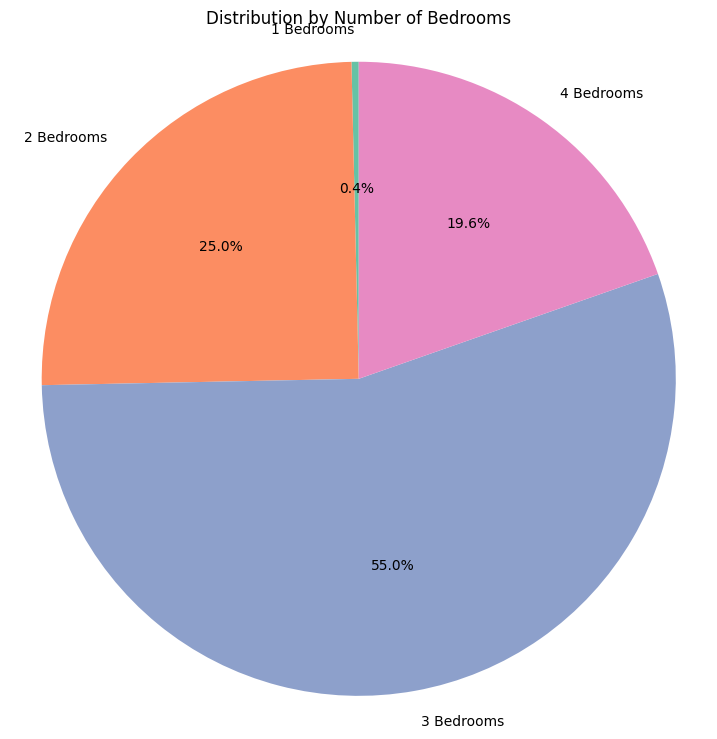

In [171]:
# 1. Furnishing Status Distribution
furnish_counts = df['furnishingstatus'].value_counts()
furnish_labels = ['Furnished', 'Semi-furnished', 'Unfurnished']
plt.figure(figsize=(6, 6))
plt.pie(furnish_counts, labels=furnish_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Furnishing Status Distribution')
plt.axis('equal')
plt.show()

# 2. Air Conditioning Availability
ac_counts = df['airconditioning'].value_counts()
ac_labels = ['No', 'Yes']
plt.figure(figsize=(6, 6))
plt.pie(ac_counts, labels=ac_labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Air Conditioning Availability')
plt.axis('equal')
plt.show()



# 4. Distribution by Number of Bedrooms
bedroom_counts = df['bedrooms'].value_counts().sort_index()
bedroom_labels = [str(i) + ' Bedrooms' for i in bedroom_counts.index]
plt.figure(figsize=(9, 9))
plt.pie(bedroom_counts, labels=bedroom_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribution by Number of Bedrooms')
plt.axis('equal')
plt.show()

C:\Users\arunp\AppData\Local\Temp\ipykernel_28860\2867837997.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='bedrooms', y='price', palette='cool')


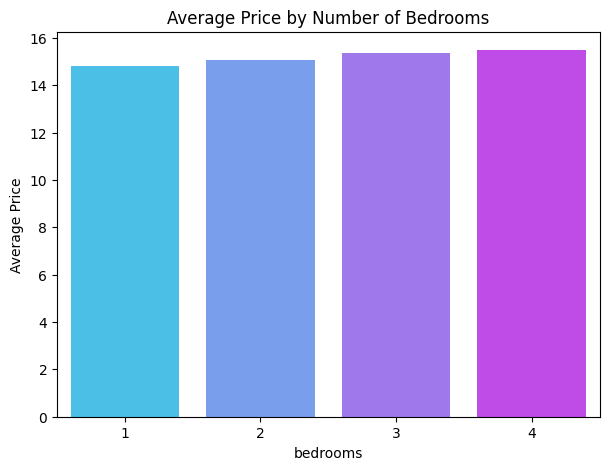

In [172]:
# Bar Plot: Average Price per Number of Bedrooms

plt.figure(figsize=(7, 5))
avg_price = df.groupby('bedrooms')['price'].mean().reset_index()
sns.barplot(data=avg_price, x='bedrooms', y='price', palette='cool')
plt.title('Average Price by Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


C:\Users\arunp\AppData\Local\Temp\ipykernel_28860\1351116912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stories', palette='Blues')


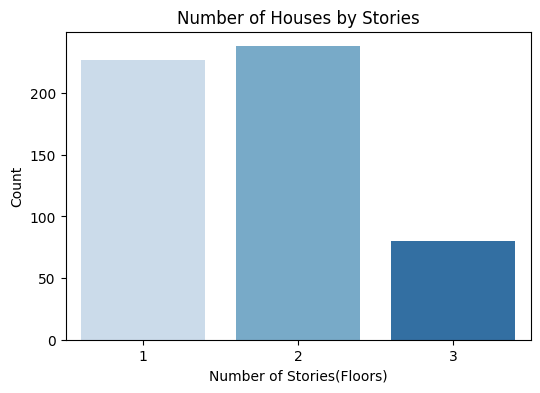

In [173]:
# Count Plot: Number of Houses by Number of Stories
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stories', palette='Blues')
plt.title('Number of Houses by Stories')
plt.xlabel('Number of Stories(Floors)')
plt.ylabel('Count')
plt.show()


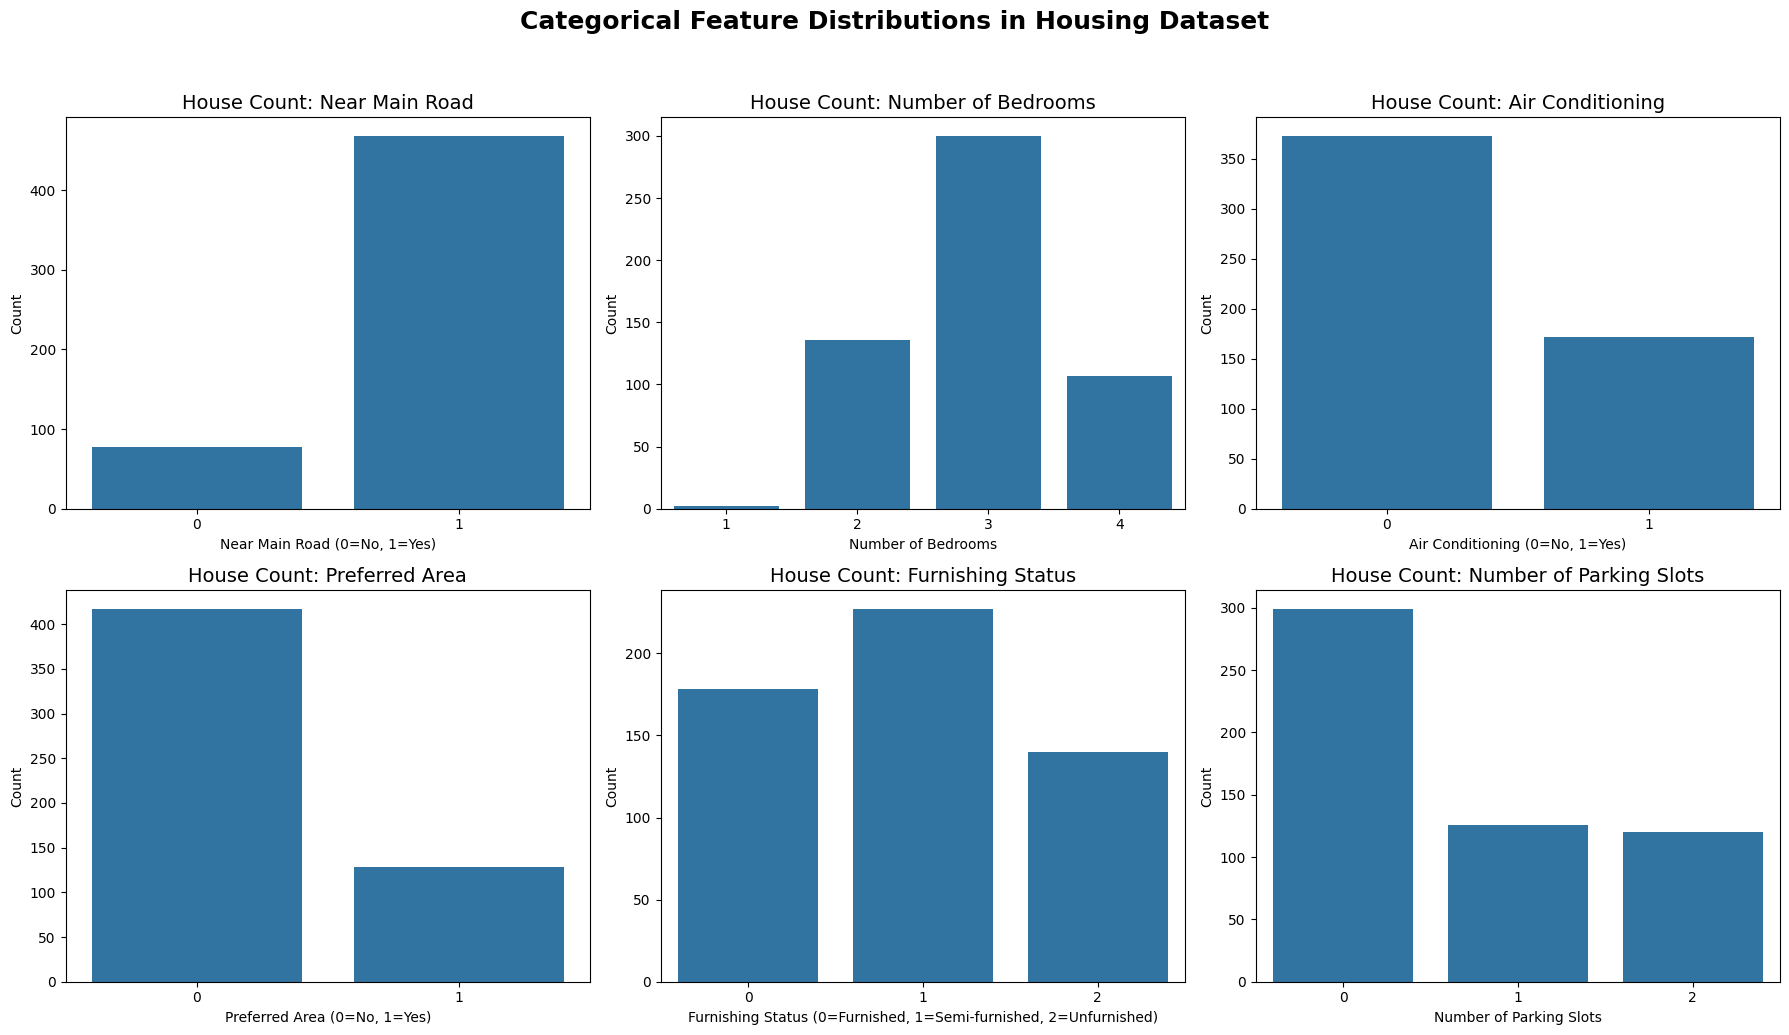

In [174]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Main Road
sns.countplot(x='mainroad', data=df, ax=axs[0,0])
axs[0,0].set_title('House Count: Near Main Road', fontsize=14)
axs[0,0].set_xlabel('Near Main Road (0=No, 1=Yes)')
axs[0,0].set_ylabel('Count')

# Bedrooms
sns.countplot(x='bedrooms', data=df, ax=axs[0,1])
axs[0,1].set_title('House Count: Number of Bedrooms', fontsize=14)
axs[0,1].set_xlabel('Number of Bedrooms')
axs[0,1].set_ylabel('Count')

# Air Conditioning
sns.countplot(x='airconditioning', data=df, ax=axs[0,2])
axs[0,2].set_title('House Count: Air Conditioning', fontsize=14)
axs[0,2].set_xlabel('Air Conditioning (0=No, 1=Yes)')
axs[0,2].set_ylabel('Count')

# Preferred Area
sns.countplot(x='prefarea', data=df, ax=axs[1,0])
axs[1,0].set_title('House Count: Preferred Area', fontsize=14)
axs[1,0].set_xlabel('Preferred Area (0=No, 1=Yes)')
axs[1,0].set_ylabel('Count')

# Furnishing Status
sns.countplot(x='furnishingstatus', data=df, ax=axs[1,1])
axs[1,1].set_title('House Count: Furnishing Status', fontsize=14)
axs[1,1].set_xlabel('Furnishing Status (0=Furnished, 1=Semi-furnished, 2=Unfurnished)')
axs[1,1].set_ylabel('Count')

# Parking
sns.countplot(x='parking', data=df, ax=axs[1,2])
axs[1,2].set_title('House Count: Number of Parking Slots', fontsize=14)
axs[1,2].set_xlabel('Number of Parking Slots')
axs[1,2].set_ylabel('Count')

fig.suptitle('Categorical Feature Distributions in Housing Dataset', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()


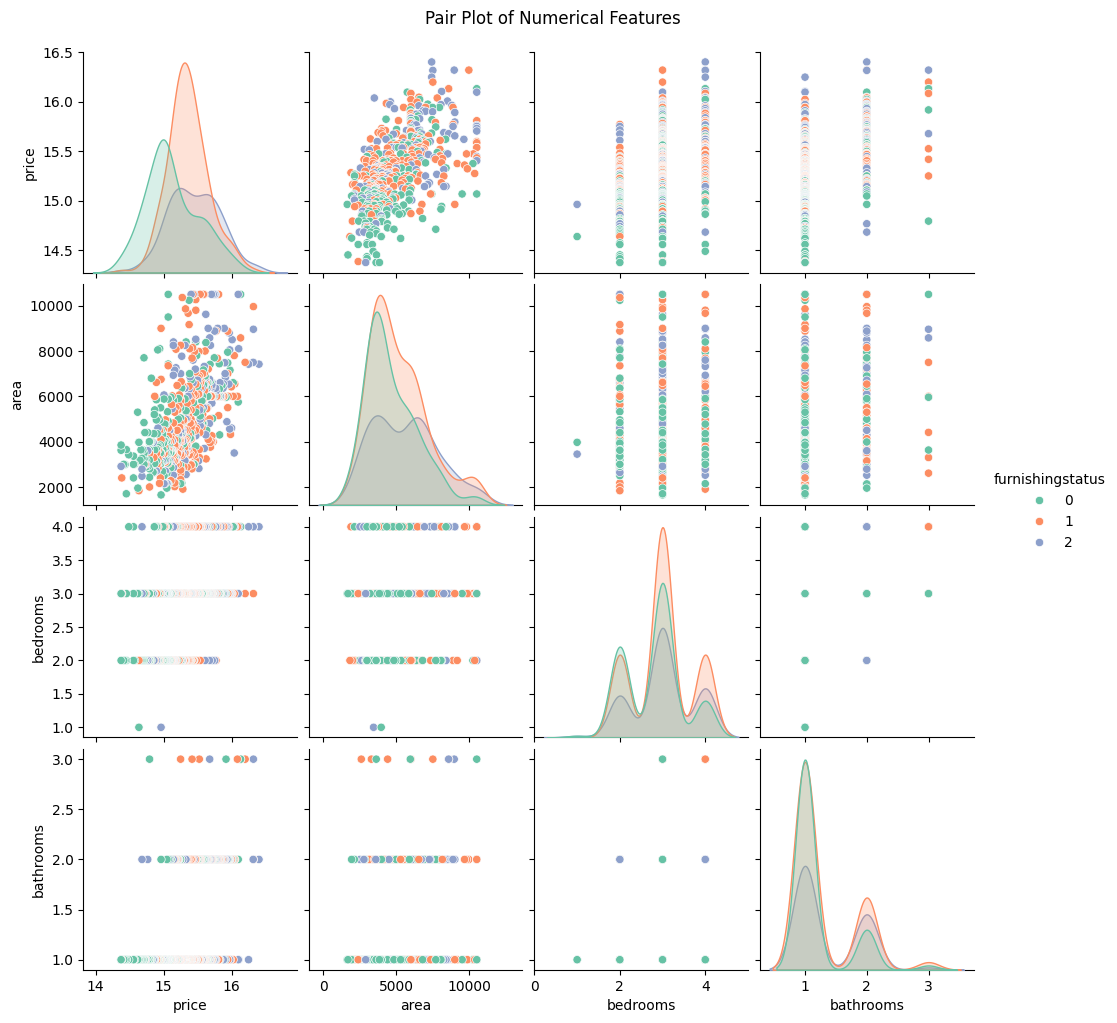

In [175]:
# Pair Plot: Relationships between Numerical Features
sns.pairplot(df, vars=['price', 'area', 'bedrooms', 'bathrooms'], hue='furnishingstatus', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


In [176]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('../data/cleaned_housing.csv', index=False)